In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import math as m
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as ml
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline
ml.style.use('fivethirtyeight')

# sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/position-salaries/Position_Salaries.csv


In [2]:
data = pd.read_csv('/kaggle/input/position-salaries/Position_Salaries.csv')
print("SHAPE = ",data.shape)
print("\nINFORMATION : \n")
print(data.info())
print("\nDESCRIPTION : \n\n",data.describe())
data.head()

SHAPE =  (10, 3)

INFORMATION : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes
None

DESCRIPTION : 

           Level          Salary
count  10.00000       10.000000
mean    5.50000   249500.000000
std     3.02765   299373.883668
min     1.00000    45000.000000
25%     3.25000    65000.000000
50%     5.50000   130000.000000
75%     7.75000   275000.000000
max    10.00000  1000000.000000


,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# LABEL ENCODING

In [3]:
print("No. of unique positions = ",data.Position.nunique())
print("\nUnique positions : \n\n",data.Position.unique())

# Label encode : As these are positions of varying importance, so can be considered as ranks (ordinal)
le = LabelEncoder()
vals = le.fit_transform(data.Position)
data['Position_enc'] = vals
data.drop(columns=['Position'],axis=1,inplace=True)
data

No. of unique positions =  10

Unique positions : 

 ['Business Analyst' 'Junior Consultant' 'Senior Consultant' 'Manager'
 'Country Manager' 'Region Manager' 'Partner' 'Senior Partner' 'C-level'
 'CEO']


,Level,Salary,Position_enc
0,1,45000,0
1,2,50000,4
2,3,60000,8
3,4,80000,5
4,5,110000,3
5,6,150000,7
6,7,200000,6
7,8,300000,9
8,9,500000,1
9,10,1000000,2


In [4]:
# Splitting into X and Y
X = np.array(data.iloc[:,0:3:2].values)
Y = np.array(data.Salary.values)
print("X shape = ",X.shape)
print("Y shape = ",Y.shape)
print("\nFeatures : \n",X)
print("\nLabels : \n",Y)

X shape =  (10, 2)
Y shape =  (10,)

Features : 
 [[ 1  0]
 [ 2  4]
 [ 3  8]
 [ 4  5]
 [ 5  3]
 [ 6  7]
 [ 7  6]
 [ 8  9]
 [ 9  1]
 [10  2]]

Labels : 
 [  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# PLOTTING THE FEATURES AND THEIR RELATION WITH SALARY

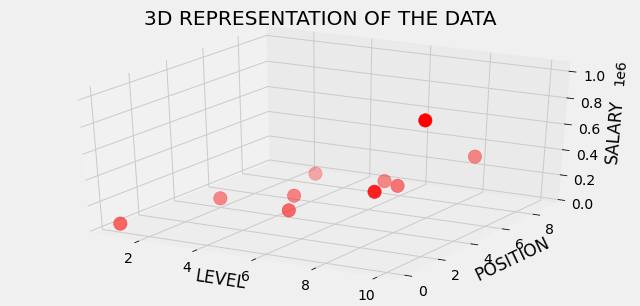

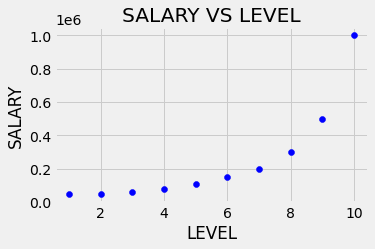

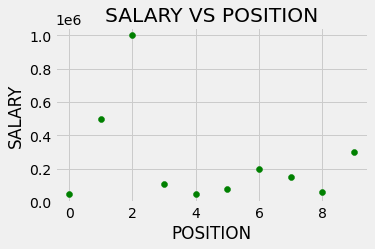

In [5]:
# Initializing fig and axes
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111,projection='3d')
# Scatter plot
ax.scatter(data.Level.values, data.Position_enc.values, data.Salary.values, zdir='z', s = 180, c = 'red', depthshade=True)
ax.set_xlabel('LEVEL')
ax.set_ylabel('POSITION')
ax.set_zlabel('SALARY')
ax.set_title('3D REPRESENTATION OF THE DATA')
plt.show()

plt.figure(figsize=(5,3))
plt.scatter(data.Level,data.Salary,c = 'blue')
plt.xlabel("LEVEL")
plt.ylabel('SALARY')
plt.title('SALARY VS LEVEL')
plt.show()
plt.figure(figsize=(5,3))
plt.scatter(data.Position_enc,data.Salary,c = 'green')
plt.xlabel("POSITION")
plt.ylabel('SALARY')
plt.title('SALARY VS POSITION')
plt.show()

### Clearly the data is non-linear.

# BUILDING THE MODEL

In [6]:
def PolyReg(trainx=X,trainy=Y,degree=2):
    testx = X
    testy = Y
    pol = PolynomialFeatures(degree=degree,order='C')
    X_poly_train = pol.fit_transform(trainx)
    X_poly_test = pol.fit_transform(testx)
    lr = LinearRegression()
    lr.fit(X_poly_train,trainy)
    y_pred = lr.predict(X_poly_test)
    r2 = r2_score(y_pred,testy)
    mse = mean_squared_error(y_pred,testy)
    rmse = m.sqrt(mean_squared_error(y_pred,testy))
    
    return r2,mse,rmse

Mean squared error = 2.342522555190971e-19 , Root mean squared error = 4.839961317191461e-10 , R2 Score = 1.0


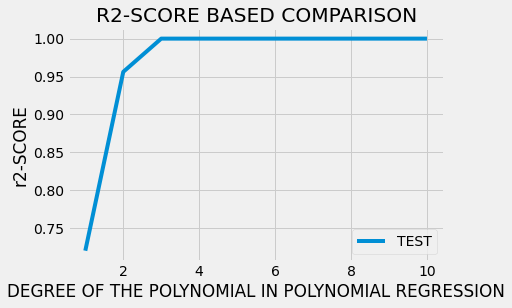

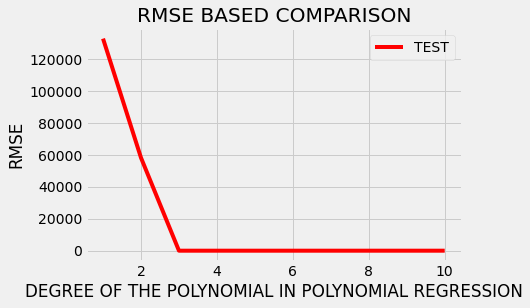

In [7]:
# Sample Run
r2,mse,rmse = PolyReg(X,Y,degree=5)
print("Mean squared error = {} , Root mean squared error = {} , R2 Score = {}".format(mse,rmse,r2))
# Plotting r2 scores to get optimum value of degree of polynomial.
iterate,rmse_it = [],[]
for i in range(1,11):
    r2_i,mse_i,rmse_i = PolyReg(X,Y,degree = i)
    iterate.append(r2_i)
    rmse_it.append(rmse_i)
    
xaxis = np.arange(10) + 1

plt.plot(xaxis,iterate,label="TEST")
plt.legend()
plt.xlabel("DEGREE OF THE POLYNOMIAL IN POLYNOMIAL REGRESSION")
plt.ylabel("r2-SCORE")
plt.title("R2-SCORE BASED COMPARISON");
plt.show()

plt.plot(xaxis,rmse_it,c = 'red', label="TEST")
plt.legend()
plt.xlabel("DEGREE OF THE POLYNOMIAL IN POLYNOMIAL REGRESSION")
plt.ylabel("RMSE")
plt.title("RMSE BASED COMPARISON");
plt.show()

### According to the plots, the optimum degree is 2. Let's check.

Root mean squared error = 58187.30885266095 , R2 Score = 0.9561863764894216



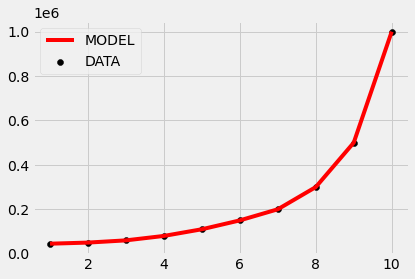

Accuracy of this model = 100.0 %


In [11]:
# Test for optimum degree = 4
r21,mse1,rmse1 = PolyReg(X,Y,degree=2)
print("Root mean squared error = {} , R2 Score = {}\n".format(rmse1,r21))

# Define function for plotting graphs for different test degrees
def plotGraph(data,trainx = X,trainy = Y, degree = 2):
    testx = X
    testy = Y
    pol = PolynomialFeatures(degree=degree,order='C')
    X_poly_train = pol.fit_transform(trainx)
    X_poly_test = pol.fit_transform(testx)
    lr = LinearRegression()
    lr.fit(X_poly_train,trainy)
    y_pred = lr.predict(X_poly_test)
    
    # Plot
    plt.scatter(data.Level,Y,label="DATA",color='black')
    plt.plot(data.Level,y_pred,label="MODEL",color='red')
    plt.legend()
    plt.show()
    
    # Accuracy
    acc = r2_score(y_pred,testy)*100
    print("Accuracy of this model = {} %".format(acc))
    
# Sample test for degree = 5
plotGraph(data,X,Y,degree = 5)

### Clearly, this is an overfit

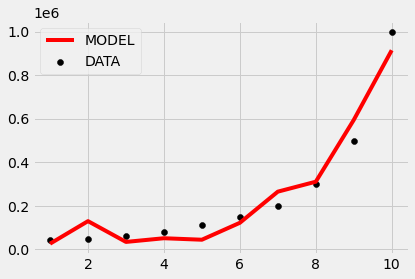

Accuracy of this model = 95.61863764894215 %


In [13]:
# Sample test for degree = 2
plotGraph(data,X,Y,degree = 2)

### An arguably good fit